In [17]:
%matplotlib inline

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Loading Mnist Dataset

In [22]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## View the dataset:

Label: 7


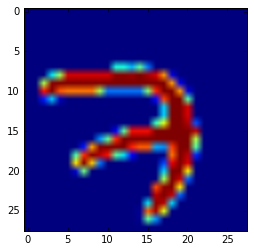

----------------------

Label: 3


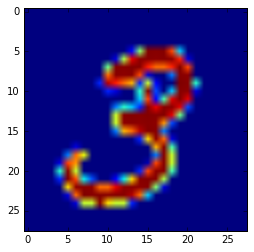

----------------------

Label: 4


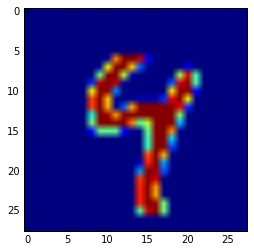

----------------------



In [21]:
for i in range(3):
    print 'Label: {}'.format(np.where(mnist.train.labels[i])[0][0])
    plt.imshow(mnist.train.images[i].reshape((28,28)))
    plt.show()
    print '----------------------\n'

# Create Tensorflow Graph

In [24]:
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b)

# Create Loss Function

In [32]:
# True labels of training data
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

# Define Optimization Function

In [33]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

# Initialize

In [34]:
init = tf.global_variables_initializer()

# Launch model in session

In [35]:
sess = tf.Session()
sess.run(init)

In [37]:
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

# Analyze results

In [42]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))

In [46]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [47]:
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9202


In [48]:
sess.close()